# Name:  Ashwini Devkota
# WeatherPy

## Analysis
    
    (1) Cities closest to the equator have highest temperatures, and temperatures 
        start to decrease as we move farther away from the equator.  However, the 
        decrease in maximum temperature is more severe towards positive latitude 
        and less toward negative latitude.
    
    (2) There is no obvious correlation between latitude and cloudiness, wind speed 
        or humidity from my data.
    
    (3) Although cities were randomly selected, there seems some bias that there are 
        more number of cities from the positive latitudes compared to the negative 
        latitudes.

In [82]:
# Import Dependencies
import requests as req
import os
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from citipy import citipy
import time

In [83]:
# Declare variables to store list values
lat = []
lon = []
cityname = []
countrycode = []

# Loop through to create 2000 random latidudes and longitudes and append them to list
for x in range(2000):
    lat1 = np.random.uniform(-90, 90)
    lat.append(lat1)
    lon1 = np.random.uniform(-180, 180)
    lon.append(lon1)
    
    # Determine nearest city and country and append them to list
    city = citipy.nearest_city(lat[x], lon[x])
    cityname1 = city.city_name
    cityname.append(cityname1)
    countrycode1 = city.country_code
    countrycode.append(countrycode1)

# Put results into a pandas DataFrame
df = pd.DataFrame({"City":cityname,
                   "Country": countrycode,
                   "Latitude": lat,
                   "Longitude": lon},
                 columns = ["City", "Country", "Latitude", "Longitude"])
# df.head()

In [84]:
# Remove any duplicate cities
unique_df = df.drop_duplicates("City", keep = "first")
#len(unique_df)

In [85]:
# Specify url and api key
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "8d1231a477d4bbcd36fe966326717bce"

In [86]:
# counter variable
count = 0

#Add columns to store values
unique_df["Date"] = ""
unique_df["Max Temp"] = ""
unique_df["Humidity"] = ""
unique_df["Cloudiness"] = ""
unique_df["Wind_Speed"] = ""

/Users/ad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/ad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [87]:
# Loop through all query url and print to screen
for index, row in unique_df.iterrows():
    count = count+1
    query_url = url + "appid=" + api_key + "&units=imperial" + "&q=" + row["City"]
    print("Processing City", count, " | ", row["City"])
    print(query_url)
    
    # Get weather data in JSON format
    try:
        weather_data = req.get(query_url)
        weather_data_json = weather_data.json()
        # print(json.dumps(weather_data_json, indent=4, sort_keys=True))
        
        # Add cloudiness, humidity, max temp and wind speed to dataframe
        unique_df.set_value(index, "Date", str(weather_data_json["dt"]))
        unique_df.set_value(index, "Cloudiness", int(weather_data_json["clouds"]["all"]))
        unique_df.set_value(index, "Humidity", int(weather_data_json["main"]["humidity"]))
        unique_df.set_value(index, "Max Temp", int(weather_data_json["main"]["temp_max"]))
        unique_df.set_value(index, "Wind_Speed", int(weather_data_json["wind"]["speed"]))
    
    # Show error message if no data
    except:
        if(unique_df["City"].empty):
            print("There is no data for city", row["City"])

print("----------------------------")
print("Data Retrieval Complete")  
print("----------------------------")

Processing City 1  |  bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=bengkulu
Processing City 2  |  dana point
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=dana point
Processing City 3  |  mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=mys shmidta
Processing City 4  |  vao
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=vao
Processing City 5  |  busselton
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=busselton
Processing City 6  |  hirara
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=hirara
Processing City 7  |  qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=qaqortoq
P

Processing City 58  |  mazyr
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=mazyr
Processing City 59  |  bluff
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=bluff
Processing City 60  |  mataura
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=mataura
Processing City 61  |  chernyy yar
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=chernyy yar
Processing City 62  |  vagur
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=vagur
Processing City 63  |  bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=bandarbeyla
Processing City 64  |  tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=tsihombe


Processing City 115  |  narsaq
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=narsaq
Processing City 116  |  barmer
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=barmer
Processing City 117  |  boende
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=boende
Processing City 118  |  bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=bathsheba
Processing City 119  |  tabialan
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=tabialan
Processing City 120  |  dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=dhidhdhoo
Processing City 121  |  ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&

Processing City 171  |  olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=olafsvik
Processing City 172  |  mengcheng
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=mengcheng
Processing City 173  |  viedma
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=viedma
Processing City 174  |  songea
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=songea
Processing City 175  |  chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=chokurdakh
Processing City 176  |  lorengau
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=lorengau
Processing City 177  |  namibe
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&

Processing City 228  |  trinidad
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=trinidad
Processing City 229  |  celestun
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=celestun
Processing City 230  |  garwa
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=garwa
Processing City 231  |  thompson
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=thompson
Processing City 232  |  puerto colombia
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=puerto colombia
Processing City 233  |  adrar
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=adrar
Processing City 234  |  tumannyy
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imp

Processing City 285  |  broome
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=broome
Processing City 286  |  hvide sande
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=hvide sande
Processing City 287  |  florence
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=florence
Processing City 288  |  portland
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=portland
Processing City 289  |  bela vista
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=bela vista
Processing City 290  |  kuching
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=kuching
Processing City 291  |  safford
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=im

Processing City 341  |  vanimo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=vanimo
Processing City 342  |  umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=umzimvubu
Processing City 343  |  yarumal
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=yarumal
Processing City 344  |  carballo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=carballo
Processing City 345  |  henties bay
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=henties bay
Processing City 346  |  yanan
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=yanan
Processing City 347  |  penzance
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&

Processing City 398  |  vila do maio
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=vila do maio
Processing City 399  |  nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=nizhniy kuranakh
Processing City 400  |  zabol
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=zabol
Processing City 401  |  george
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=george
Processing City 402  |  sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=sentyabrskiy
Processing City 403  |  rakai
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=rakai
Processing City 404  |  saldanha
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe96632671

Processing City 454  |  kankon
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=kankon
Processing City 455  |  cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=cabo san lucas
Processing City 456  |  dudinka
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=dudinka
Processing City 457  |  versalles
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=versalles
Processing City 458  |  khudumelapye
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=khudumelapye
Processing City 459  |  santa clara
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=santa clara
Processing City 460  |  atambua
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966

Processing City 511  |  ntungamo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=ntungamo
Processing City 512  |  smithers
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=smithers
Processing City 513  |  douentza
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=douentza
Processing City 514  |  trani
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=trani
Processing City 515  |  yeniseysk
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=yeniseysk
Processing City 516  |  dunedin
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=dunedin
Processing City 517  |  nyanguge
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=

Processing City 568  |  monte patria
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=monte patria
Processing City 569  |  inhambane
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=inhambane
Processing City 570  |  ambon
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=ambon
Processing City 571  |  toungoo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=toungoo
Processing City 572  |  mitsamiouli
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=mitsamiouli
Processing City 573  |  dien bien
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=dien bien
Processing City 574  |  khatassy
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&u

Processing City 625  |  santo domingo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=santo domingo
Processing City 626  |  hualmay
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=hualmay
Processing City 627  |  batsfjord
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=batsfjord
Processing City 628  |  kirkland lake
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=kirkland lake
Processing City 629  |  sinkat
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=sinkat
Processing City 630  |  utiroa
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=utiroa
Processing City 631  |  stropkov
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce

Processing City 682  |  fuerte olimpo
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=fuerte olimpo
Processing City 683  |  malartic
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=malartic
Processing City 684  |  pochutla
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=pochutla
Processing City 685  |  ouranopolis
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=ouranopolis
Processing City 686  |  morehead
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=morehead
Processing City 687  |  high level
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=high level
Processing City 688  |  bargal
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326

Processing City 739  |  lundin links
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=lundin links
Processing City 740  |  tisovec
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=tisovec
Processing City 741  |  sibu
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=sibu
Processing City 742  |  necochea
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=necochea
Processing City 743  |  vicosa do ceara
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=vicosa do ceara
Processing City 744  |  puksoozero
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe966326717bce&units=imperial&q=puksoozero
Processing City 745  |  mujiayingzi
http://api.openweathermap.org/data/2.5/weather?appid=8d1231a477d4bbcd36fe96632

In [88]:
# Remove any rows containing empty values
unique_df = unique_df.replace("", np.nan)
unique_df.dropna(how = "any", inplace = True)
#len(unique_df)

In [89]:
# Check to see if all field counts are same
unique_df.count()

City          673
Country       673
Latitude      673
Longitude     673
Date          673
Max Temp      673
Humidity      673
Cloudiness    673
Wind_Speed    673
dtype: int64

In [90]:
unique_df.head()

,City,Country,Latitude,Longitude,Date,Max Temp,Humidity,Cloudiness,Wind_Speed
1,dana point,us,32.746596,-118.121761,1519855080,62.0,62.0,1.0,10.0
3,vao,nc,-27.088292,165.232422,1519857751,1.0,92.0,20.0,5.0
4,busselton,au,-58.212701,86.782430,1519857760,62.0,100.0,0.0,11.0
5,hirara,jp,21.144415,128.541418,1519857748,69.0,100.0,0.0,19.0
6,qaqortoq,gl,63.923653,-43.057192,1519854600,46.0,39.0,8.0,4.0


In [91]:
output_file = os.path.join("Output", "OutputFile.csv")
unique_df.to_csv(output_file, index = False, header = True)

In [92]:
date = time.strftime("%m/%d/%Y")
# print(date)

# Latitude vs Temperature Plot

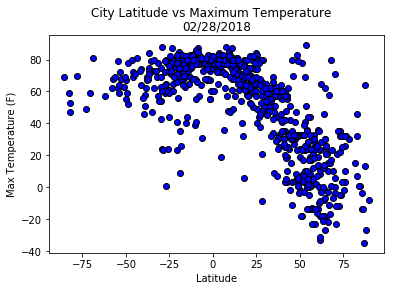

In [93]:
# Latitude vs max temperature scatter plot
plt.scatter(unique_df["Latitude"], unique_df["Max Temp"], color = "blue", edgecolor = "black")
plt.suptitle("City Latitude vs Maximum Temperature")
plt.title(date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Define output file path and export graph to output folder
temp_path = os.path.join("output", "latitude_vs_temperature.png")
plt.savefig(temp_path)

# Print plot to the screen
plt.show()

# Latitude vs Humidity Plot

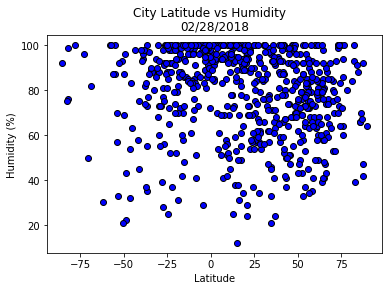

In [94]:
# Latitude vs humidity scatter plot
plt.scatter(unique_df["Latitude"], unique_df["Humidity"], color = "blue", edgecolor = "black")
plt.suptitle("City Latitude vs Humidity")
plt.title(date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Define output file path and export graph to output folder
humidity_path = os.path.join("output", "latitude_vs_humidity.png")
plt.savefig(humidity_path)

# Print plot to the screen
plt.show()

# Latitude vs Cloudiness Plot

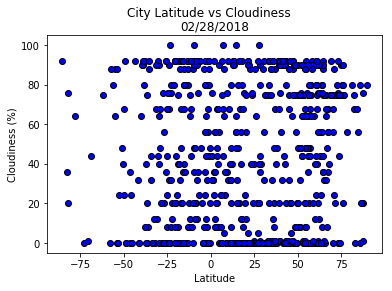

In [95]:
# Latitude vs cloudiness scatter plot
plt.scatter(unique_df["Latitude"], unique_df["Cloudiness"], color = "blue", edgecolor = "black")
plt.suptitle("City Latitude vs Cloudiness")
plt.title(date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Define output file path and export graph to output folder
cloudiness_path = os.path.join("output", "latitude_vs_cloudiness.png")
plt.savefig(cloudiness_path)

# Print plot to the screen
plt.show()

# Latitude vs Wind Speed Plot

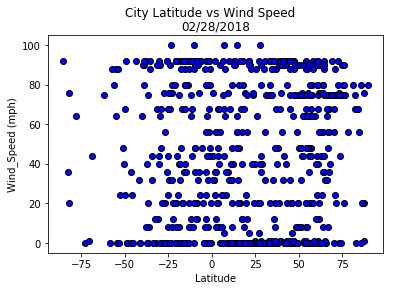

In [96]:
# Latitude vs wind speed scatter plot
plt.scatter(unique_df["Latitude"], unique_df["Cloudiness"], color = "blue", edgecolor = "black")
plt.suptitle("City Latitude vs Wind Speed")
plt.title(date)
plt.xlabel("Latitude")
plt.ylabel("Wind_Speed (mph)")

# Define output file path and export graph to output folder
windspeed_path = os.path.join("output", "latitude_vs_windspeed.png")
plt.savefig(windspeed_path)

# Print plot to the screen
plt.show()